In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [112]:
from sklearn.model_selection import train_test_split

# Linear Regression, Lasso, Ridge

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# SVM, Logistic Regression, Random Forrest
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Exercise 2

You need to use the Ex2data1.csv to fit multiple models which will be used to classify the target variable in column label.

Use only two features p1, p2
- Plot the points with different colours for the different classes.
- Split the data into a training set and a testing set. In each of the following points,the models are to be fit to the training set, the accuracy is to be analysed on both the training set and testing set.
- Train the cross-validated logistic regression. Plot the ROC curve, compute the area under the ROC curve for the model.
- Train a classification tree on the same dataset. Investigate the accuracy when using the full tree. Compare it to the accuracy attained with the logistic regression. Note: given the particular structure of the data, training the full tree may take a while.
- Plot the ROC curve for the full tree (both for the training and learning set.

In [39]:
Ex2data1 = pd.read_csv("Ex2data1.csv")
Ex2data1.set_index("Unnamed: 0", inplace = True)


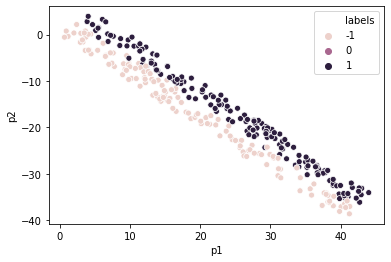

In [40]:
#Ex2data1["labels"] = Ex2data1["labels"].astype(str)
#Ex2data1["labels"] = Ex2data1["labels"].astype("category")
ax = sns.scatterplot(x="p1", y="p2", hue="labels", data=Ex2data1)

In [41]:
Ex2data1_tr, Ex2data1_te = train_test_split(Ex2data1, test_size = 0.25, random_state = 123)


In [52]:
X = Ex2data1_tr[["p1","p2"]]
y = Ex2data1_tr["labels"]
lr = LogisticRegressionCV(cv=5, random_state=123)
lr.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=123, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

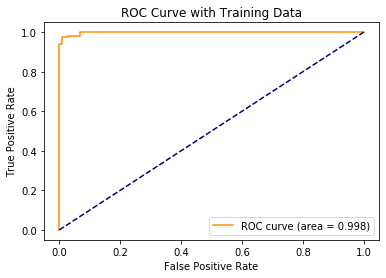

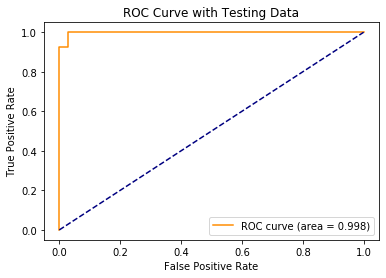

In [94]:
predict_tr = lr.predict_proba(X)[:,1] #probability of getting 1 (on the second column)
predict_te = lr.predict_proba(Ex2data1_te[["p1","p2"]])[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y, predict_tr, pos_label=1)
# pos_label - the label that will be predicted if the probability value is high
AUC = roc_auc_score(y, predict_tr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', label='ROC curve (area = %0.3f)' %AUC)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve with Training Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

fpr2, tpr2, thresholds2 = metrics.roc_curve(Ex2data1_te["labels"],predict_te, pos_label=1)
# pos_label - the label that will be predicted if the probability value is high
AUC2 = roc_auc_score(Ex2data1_te["labels"], predict_te)

plt.figure()

plt.plot(fpr2,tpr2, color='darkorange', label='ROC curve (area = %0.3f)' %AUC2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve with Testing Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


In [104]:
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=2, random_state=1)
tree.fit(X, y)
tree_predict_tr = tree.predict(X)
tree_predict_te = tree.predict(Ex2data1_te[["p1","p2"]])
lr_predict_tr = lr.predict(X) #probability of getting 1 (on the second column)
lr_predict_te = lr.predict(Ex2data1_te[["p1","p2"]])

print("Decision Tree training set accuracy =", accuracy_score(y,tree_predict_tr))
print("Decision Tree testing set accuracy =", accuracy_score(Ex2data1_te["labels"],tree_predict_te))
print("Logistic Regression training set accuracy =", accuracy_score(y,lr_predict_tr))
print("Logistic Regression testing set accuracy =", accuracy_score(Ex2data1_te["labels"],lr_predict_te))

Decision Tree training set accuracy = 1.0
Decision Tree testing set accuracy = 0.92
Logistic Regression training set accuracy = 0.9733333333333334
Logistic Regression testing set accuracy = 0.9466666666666667


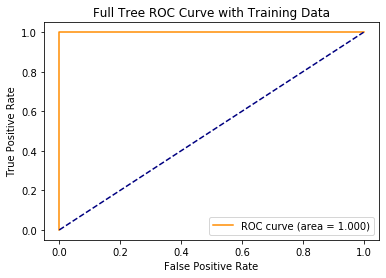

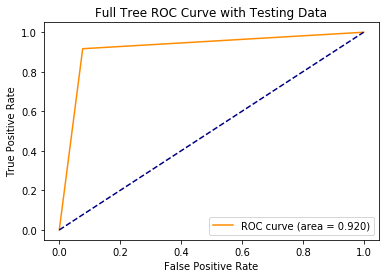

In [111]:
def ROC(c_matrix):
    TP = c_matrix[0,0]
    FP = c_matrix[1,0]
    TN = c_matrix[1,1]
    FN = c_matrix[0,1]
    
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    
    return (FPR,TPR)
    
Tree_ROC_curve_tr = ROC(confusion_matrix(y,tree_predict_tr))
Tree_ROC_curve_te = ROC(confusion_matrix(Ex2data1_te["labels"],tree_predict_te))
Tree_AUC_tr = auc([0,Tree_ROC_curve_tr[0],1],[0,Tree_ROC_curve_tr[1],1])
Tree_AUC_te = auc([0,Tree_ROC_curve_te[0],1],[0,Tree_ROC_curve_te[1],1])


plt.figure()
plt.plot([0,Tree_ROC_curve_tr[0],1],[0,Tree_ROC_curve_tr[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Tree_AUC_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Full Tree ROC Curve with Training Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.figure()
plt.plot([0,Tree_ROC_curve_te[0],1],[0,Tree_ROC_curve_te[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Tree_AUC_te)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Full Tree ROC Curve with Testing Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

Full decision tree seems to overfit the data as it has perfect performance in the training data set but have a worse performance with the testing data set compare to logistic regression.

Use all three features p1, p2, p3
- Train a classification tree on the dataset. Investigate the accuracy on both the full tree, and also on the pruned tree. Compare it to the accuracy and ROC curve. Is there any need for pruning? Explain the outcome.
-  Train a random forests on the same dataset. Compare it to the performance attained with the classification tree.

In [145]:
X2_tr = Ex2data1_tr[["p1","p2","p3"]]
y2_tr = Ex2data1_tr["labels"]

X2_te = Ex2data1_te[["p1","p2","p3"]]
y2_te = Ex2data1_te["labels"]

#build full tree with new predictors
tree2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=2, random_state=1)
tree2.fit(X2_tr, y2_tr)
tree2_predict_tr2 = tree2.predict(X2_tr)
tree2_predict_te2 = tree2.predict(X2_te)

#build pruned tree
tree_pruned = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=0.2, max_depth = 4, max_leaf_nodes = 4, random_state=1)
tree_pruned.fit(X2_tr, y2_tr)
tree_pruned_predict_tr = tree_pruned.predict(X2_tr)
tree_pruned_predict_te = tree_pruned.predict(X2_te)

#build random forest
forest = RandomForestClassifier(criterion='entropy', n_estimators=50,min_samples_leaf=0.2, max_depth = 3, max_leaf_nodes = 4, random_state=1)
forest.fit(X2_tr, y2_tr)
forest_predict_tr = forest.predict(X2_tr)
forest_predict_te = forest.predict(X2_te)

In [146]:
#compare accurary
print("Full Tree training set accuracy =", accuracy_score(y2_tr,tree2_predict_tr2))
print("Full Tree testing set accuracy =", accuracy_score(y2_te,tree2_predict_te2))
print("Pruned Tree training set accuracy =", accuracy_score(y2_tr,tree_pruned_predict_tr))
print("Pruned Tree testing set accuracy =", accuracy_score(y2_te,tree_pruned_predict_te))
print("Random Forest training set accuracy =", accuracy_score(y2_tr,forest_predict_tr))
print("Random Forest testing set accuracy =", accuracy_score(y2_te,forest_predict_te))


Full Tree training set accuracy = 1.0
Full Tree testing set accuracy = 0.96
Pruned Tree training set accuracy = 0.9822222222222222
Pruned Tree testing set accuracy = 0.9466666666666667
Random Forest training set accuracy = 0.9733333333333334
Random Forest testing set accuracy = 0.96


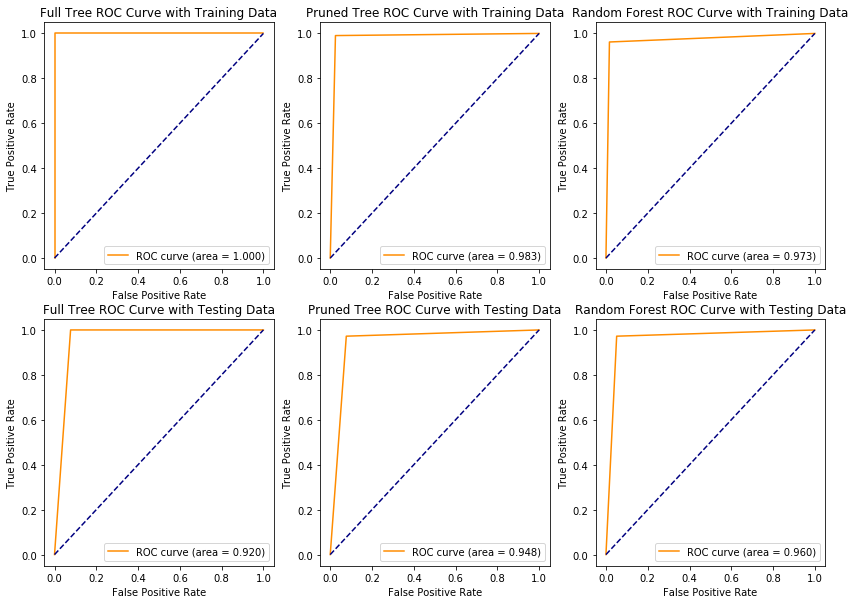

In [153]:
plt.rcParams['figure.figsize'] = [14, 10]

Tree2_ROC_curve_tr = ROC(confusion_matrix(y2_tr,tree2_predict_tr2))
Tree2_ROC_curve_te = ROC(confusion_matrix(y2_te,tree2_predict_te2))
Tree2_AUC_tr = auc([0,Tree_ROC_curve_tr[0],1],[0,Tree_ROC_curve_tr[1],1])
Tree2_AUC_te = auc([0,Tree_ROC_curve_te[0],1],[0,Tree_ROC_curve_te[1],1])

plt.subplot(231)
plt.plot([0,Tree2_ROC_curve_tr[0],1],[0,Tree2_ROC_curve_tr[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Tree2_AUC_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Full Tree ROC Curve with Training Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.subplot(234)
plt.plot([0,Tree2_ROC_curve_te[0],1],[0,Tree2_ROC_curve_te[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Tree2_AUC_te)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Full Tree ROC Curve with Testing Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

Pruned_Tree_ROC_curve_tr = ROC(confusion_matrix(y2_tr,tree_pruned_predict_tr))
Pruned_Tree_ROC_curve_te = ROC(confusion_matrix(y2_te,tree_pruned_predict_te))
Pruned_Tree_AUC_tr = auc([0,Pruned_Tree_ROC_curve_tr[0],1],[0,Pruned_Tree_ROC_curve_tr[1],1])
Pruned_Tree_AUC_te = auc([0,Pruned_Tree_ROC_curve_te[0],1],[0,Pruned_Tree_ROC_curve_te[1],1])

plt.subplot(232)
plt.plot([0,Pruned_Tree_ROC_curve_tr[0],1],[0,Pruned_Tree_ROC_curve_tr[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Pruned_Tree_AUC_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Pruned Tree ROC Curve with Training Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.subplot(235)
plt.plot([0,Pruned_Tree_ROC_curve_te[0],1],[0,Pruned_Tree_ROC_curve_te[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Pruned_Tree_AUC_te)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Pruned Tree ROC Curve with Testing Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

Random_Forest_ROC_curve_tr = ROC(confusion_matrix(y2_tr,forest_predict_tr))
Random_Forest_ROC_curve_te = ROC(confusion_matrix(y2_te,forest_predict_te))
Random_Forest_AUC_tr = auc([0,Random_Forest_ROC_curve_tr[0],1],[0,Random_Forest_ROC_curve_tr[1],1])
Random_Forest_AUC_te = auc([0,Random_Forest_ROC_curve_te[0],1],[0,Random_Forest_ROC_curve_te[1],1])

plt.subplot(233)
plt.plot([0,Random_Forest_ROC_curve_tr[0],1],[0,Random_Forest_ROC_curve_tr[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Random_Forest_AUC_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Random Forest ROC Curve with Training Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.subplot(236)
plt.plot([0,Random_Forest_ROC_curve_te[0],1],[0,Random_Forest_ROC_curve_te[1],1], color='darkorange', label='ROC curve (area = %0.3f)' %Random_Forest_AUC_te)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Random Forest ROC Curve with Testing Data")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


The pruned tree definitely have an improved performance in its testing dataset compare to the full tree, with a drop in performance in with the training data set.

The (pruned) random forest seems to have the best testing dataset performance and the least difference in performance between training and testing dataset. This suggest it best address the overfitting problem for these decision tree models. 

This makes sense as random forest chooses not all predictors to use for deciding the optimal split of each nodes and it also create a lot of "randomize" decision trees to aggregates its prediction results, these methods should contribute to the reduction in the overfitting of decision trees model, but introducing randomness to the training process to make model perform better for out of sample prediction. 